In [1]:
import numpy as np
from PIL import Image
import os, glob
import matplotlib.pyplot as plt

In [2]:
folders = glob.glob("../balerinas_dataset/data/*")
folders

['../balerinas_dataset/data/BallerinasInTutu',
 '../balerinas_dataset/data/BallerinaInLongTulle',
 '../balerinas_dataset/data/WomenInTutu',
 '../balerinas_dataset/data/WomenInEveningDress']

In [4]:
def resize(filename, shape = (256, 256)):
    ''' Function ...'''
    try:
        im = Image.open(filename)
        im_size = im.size
        if float(im_size[0]) / im_size[1] < 2.0 and float(im_size[1]) / im_size[0] < 2.0:
            im = im.resize(shape, Image.BICUBIC)
            im = np.array(im.getdata()).reshape(shape[0], shape[1], 3)
            return [True, im]
        else:
            return [False, None]
        
    except:
        return [False, None]

In [5]:
def preprocess_class(folder_path, shape = (256,256)):
    images = os.listdir(folder_path)
    matrix = []
    for image in images:
        image_path = folder_path + '/' + image
        image = resize(image_path, shape)
        if image[0]==True:
            matrix.append(np.expand_dims(image[1], axis=0))
    matrix = np.vstack(matrix) 
    return matrix

In [6]:
matrix = preprocess_class(folders[1])

/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  "Skipping tag %s" % (size, len(data), tag))


In [7]:
def plot_im(im):
    plt.imshow(im.astype(np.uint8))
    plt.show()

In [8]:
def preprocess_dataset(data_path, shape = (256, 256), class_names=None):
    ''' Something ...'''
    folders = os.listdir(data_path)
    dataset = []
    classes = []
    
    if class_names==None:
        class_names = {}
        for i in folders:
            class_names[i] = len(class_names)
    
    for folder in folders:
        path = data_path + '/' + folder
        print('Processing class "{0}"'.format(folder))
        image_class = preprocess_class(path, shape = shape)
        dataset.append([image_class, len(image_class)])
        classes.append(np.repeat(class_names[folder], len(image_class)))
    
    dataset = np.vstack([d[0] for d in dataset])
    classes = np.hstack(classes)
    
    return [dataset, classes]
    

In [9]:
X, y = preprocess_dataset('../balerinas_dataset/data')

Processing class "BallerinasInTutu"
Processing class "BallerinaInLongTulle"


/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  "Skipping tag %s" % (size, len(data), tag))


Processing class "WomenInTutu"
Processing class "WomenInEveningDress"


/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6291456 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.4/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting t

In [10]:
print(X.shape, y.shape)

(2886, 256, 256, 3) (2886,)


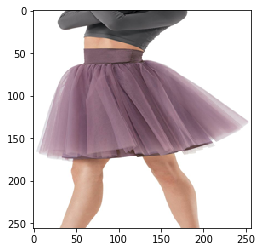

In [11]:
plot_im(X[1500])

In [12]:
def split_dataset(X, y, fraction = (0.8, 0.2, None), randomize=True):
    length = X.shape[0]
    indexes = np.arange(length)
    if randomize:
        indexes = np.random.shuffle(indexes)
    ind1 = round(fraction[0]*length)
    ind2 = round(fraction[0]*length)+round(fraction[1]*length)
    train_X, train_y = X[0:ind1], y[0:ind1]
    val_X, val_y = X[ind1:ind2], y[ind1:ind2]
    if not fraction==None:
        test_X, test_y = X[ind2:], y[ind2:0]
        return {
            'train':[train_X, train_y],
            'val':[val_X, val_y],
            'test':[test_X, test_y] 
        }
    else:
        return {
            'train':[train_X, train_y],
            'val':[val_X, val_y],
        }        

In [13]:
dataset = split_dataset(X, y, fraction = (0.8, 0.1, 0.1))

In [14]:
import pickle

In [16]:
save_path = '../balerinas_dataset/data/dataset.pickle'

with open(save_path ,'wb') as f:
        pickle.dump(dataset, f)

In [19]:
def load_dataset(path):
    ''' Loads dataset into memory '''
    with open(path ,'rb') as f:
        data = pickle.load(f)
    
    return data

In [20]:
loaded_dataset = load_dataset('../balerinas_dataset/data/dataset.pickle')

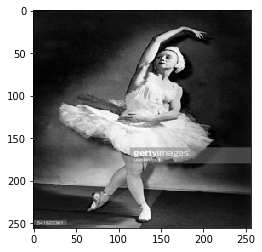

In [23]:
plot_im(loaded_dataset['train'][0][0])